In [1]:
import math
import numpy as np
import pandas as pd
try:
    from skmisc.loess import loess
except ImportError:
    from util import loess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [2]:
# X is contained in the first column of the data, y in the second.

data = pd.read_csv("data.csv", header = None)
X = data[0]
y = data[1]

Create a scatterplot of the data. 

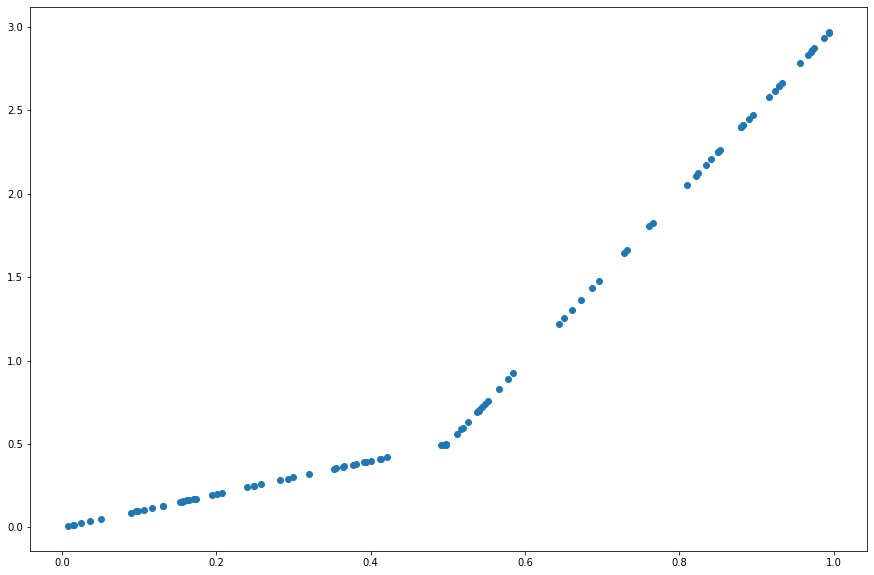

In [3]:
plt.scatter(X, y)
plt.show()

The data appears to be a piece wise linear function which has a single transition point (cut-point) somewhere around x = 0.5. The data, in both phases, is linear with different slopes (second slope being higher than the first).

We now define the kernels $K_1,...,K_4$ as

In [4]:
def K1(x, x_):
    return 1

def K2(x, x_, lam = 1):
    return pow(1 - pow(abs((x - x_)/lam), 3), 3)

def K3(x, x_, lam = 1):
    return math.e ** (-lam * pow(abs(x - x_), 2))

def K4(x, x_, L = 2):
    
    flag = 0
    for l in range(1, L):
        if ((x >= (l-1)/L) and (x < (l)/L)) and ((x_ >= (l-1)/L) and (x_ < (l)/L)):
            flag = 1
    
    return flag

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [5]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    X = np.array(X)
    y = np.array(y)
    K_output = pairwise_kernels(X.reshape(-1, 1), Y=y.reshape(-1, 1), metric=
                      K)
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    y_hat = loess(X, y, K_output)
    # Return a vector of the predictions at each point in X.
    return y_hat

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 2)

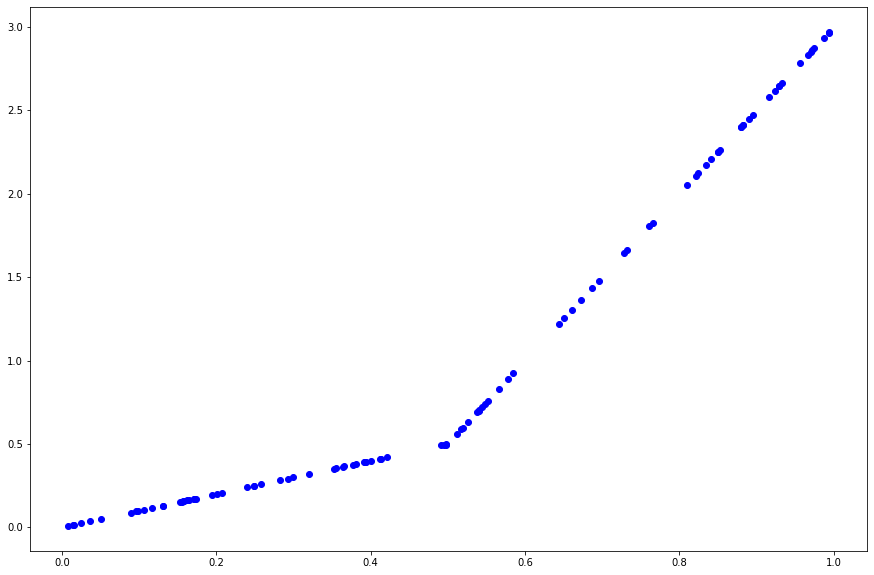

In [6]:
from functools import partial # You may want to use this to make your life easier.
# Added the additional parameters for the kernels as the default value instead.

plt.scatter(X, y, c='b')
for kernel in [K1, K2, K3, K4]:
    func = partial(pred, K = kernel)
    y_hat = func(X,y)
    plt.plot(y_hat)
    
# Adding a legend so we know which kernel produced what is good style.
plt.legend(['K1', 'K2', 'K3', 'K4'])

Eventhough, the output failed to converge a solution for a dimensional error, we believe kernel K4 will produce the best results because of the kernel properties where the data is almost linear and equal weightage from closer neighbours will suffice the task, whereas other kernels will have lower contributions from farther points.